# $\textbf{Error Analysis of objects around the main sources}$

## Our aim is to find the average error of surrounding objects of main source for both Herbig Ae/Be and Random stars 

In [91]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd

from astroquery.gaia import Gaia
import seaborn as sn

from tqdm import tqdm

### $\textbf{Importing 1M stars for plotting HR Diagram}$

In [240]:
# importing csv file of 1m sources containing Gaia data for plotting HR diagram
filename = '1M.csv'
df1 = pd.read_csv(filename)

# filtering data on the basis of parallax error so that we can get better observed sources
df = df1[df1['parallax_error']< 0.1]
df = df.reset_index(drop=True)


gk_1m = df["phot_g_mean_mag"] - df["ks_m"]
mg = df["mg"]

y_values1 = np.linspace(1, 4.5, 50)
y_values2 = np.linspace(4.5, 8.5, 100)
y_values3 = np.linspace(8.5, 14.0, 100)

### $\textbf{Importing all Herbig Ae/Be Stars from Vioque M. catalog}$

In [3]:
all_herbig = pd.read_csv("all_herbig star.csv")

### $\textbf{Keeping only required columns from all\_herbig list }$

In [4]:
herbig_star = all_herbig[["Name", "RAICRS", "DEICRS", "Dist", "E_Dist", "e_Dist"]]
herbig_star = herbig_star.sort_values(by='Dist')
herbig_star = herbig_star.reset_index(drop=True)

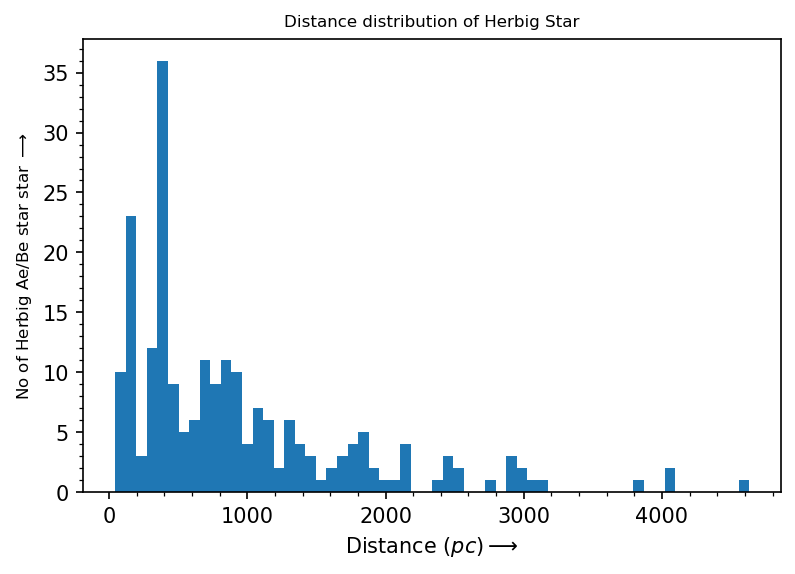

In [5]:
plt.figure(dpi=150)
plt.title("Distance distribution of Herbig Star", fontsize = 8)

#---------------------------------------------------------------------------------
#                     IMPORTING HISTOGRAM
"""   EXTRACTING INFORMATON OF HERBIG STAR DISTANCE HISTOGRAM    """

max_num_herbig, herbig_bin, patch = plt.hist(herbig_star["Dist"], bins=60)

#---------------------------------------------------------------------------------
plt.xlabel(r"Distance $(pc)\longrightarrow$")
plt.ylabel(r"No of Herbig Ae/Be star star $\longrightarrow$", fontsize = 8)
plt.minorticks_on()
plt.show()

### $\textbf{Importing Random star}$

In [6]:
all_random = pd.read_csv("test_star_set2.csv")
random_star = all_random[(all_random["parallax_error"] < 0.1)] 
random_star = random_star[(random_star["r_med_photogeo"]> min(herbig_star["Dist"]))& (random_star["r_med_photogeo"] < max(herbig_star["Dist"])+1 )]
random_star = random_star.reset_index(drop=True)


### $\textbf{Choosing 218 random star same as herbig distance distribution}$

In [7]:
num_star = np.zeros(len(max_num_herbig))
star_bin = herbig_bin
random_star_sample = pd.DataFrame()
sum_star = 0

while sum_star < 10000:
    random_sample = random_star.sample(1, replace= False)

    for i in range(len(max_num_herbig)):
    
        if (random_sample.iloc[0]["r_med_photogeo"] >= herbig_bin[i]) & (random_sample.iloc[0]["r_med_photogeo"] < herbig_bin[i+1]):
            if num_star[i] < (max_num_herbig[i]):
                random_star_sample = pd.concat((random_star_sample, random_sample), axis=0)
                num_star[i] += 1

        
        # print(sum_star)
    if sum(num_star)== sum(max_num_herbig):
        break
    sum_star += 1


In [8]:
herbig_star

,Name,RAICRS,DEICRS,Dist,E_Dist,e_Dist
0,HD 39014,86.192917,-65.735556,44.1,1.0,0.9
1,HD 9672,23.657917,-15.676389,57.1,0.5,0.5
2,HD 199603,314.674167,-14.483333,89.3,1.4,1.3
3,HD 163296,269.088750,-21.956111,101.5,2.0,1.9
4,HD 100453,173.272917,-54.324722,104.2,0.7,0.7
...,...,...,...,...,...,...
213,MWC 657,340.674167,60.400278,3164.2,395.6,286.7
214,Hen 3-938,208.178333,-63.546944,3851.6,639.0,449.3
215,HD 305298,158.270833,-60.330833,4039.5,628.2,442.9
216,AS 470,324.059167,57.358611,4039.6,616.9,439.7


In [9]:
random_star_sample = random_star_sample.sort_values(by='r_med_photogeo')
random_star_sample = random_star_sample.reset_index(drop=True)
random_star_sample

,source_id,ra,dec,parallax,parallax_error,r_med_geo,r_lo_geo,r_hi_geo,sigma_geo,r_med_photogeo,...,sigma_photogeo,phot_g_mean_mag,mv,w1mpro,w2mpro,w3mpro,w4mpro,j_m,h_m,ks_m
0,5765935565579305728,216.516559,-86.929093,19.050916,0.067322,52.151740,52.059082,52.267270,0.001996,52.169704,...,0.003215,15.690699,12.090278,11.515,11.310,10.985,9.109,12.584,11.992,11.689
1,5782743318797509888,188.702884,-82.980205,15.279747,0.034621,65.312706,65.211780,65.450840,0.001830,65.292260,...,0.003495,9.322411,5.242991,7.292,7.367,7.320,7.196,7.914,7.463,7.330
2,5772582422607911424,213.116257,-81.963575,15.112102,0.054142,65.769640,65.678180,65.865740,0.001426,65.781270,...,0.003008,15.558970,11.455595,11.442,11.262,10.990,8.949,12.525,11.932,11.632
3,5783909557037700736,188.966703,-81.599941,11.755289,0.058072,85.080890,84.769775,85.393425,0.003665,85.125740,...,0.005828,15.959366,11.310532,12.387,12.157,11.905,9.375,13.277,12.759,12.499
4,5764965830683361408,185.278814,-88.662143,11.535867,0.049086,86.823875,86.602020,87.024895,0.002435,86.813890,...,0.004572,15.364307,10.674559,11.537,11.363,11.224,8.916,12.424,11.908,11.715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,6344178248273610880,346.298218,-84.552114,0.300393,0.052576,3198.774700,2786.447500,3688.635000,0.141021,3137.819000,...,0.237082,16.655584,4.044032,15.117,15.271,12.769,9.003,15.463,15.172,15.254
214,5782802761145332608,194.329683,-82.881147,0.189010,0.036463,4068.198700,3685.341800,4461.580000,0.095403,3840.375000,...,0.221414,15.639980,2.022407,12.797,12.867,12.511,9.378,13.728,13.004,12.900
215,4630915828258904576,0.509136,-82.013023,0.202732,0.014163,4197.018000,4005.140100,4419.556000,0.049370,4053.990000,...,0.085466,13.575430,0.110038,10.664,10.768,10.605,9.168,11.594,10.899,10.741
216,4617689321852227072,2.687589,-84.068961,0.198189,0.015980,4067.825000,3837.734600,4359.258300,0.064104,4085.447500,...,0.103397,14.105876,0.591272,11.706,11.784,11.508,8.931,12.444,11.876,11.784


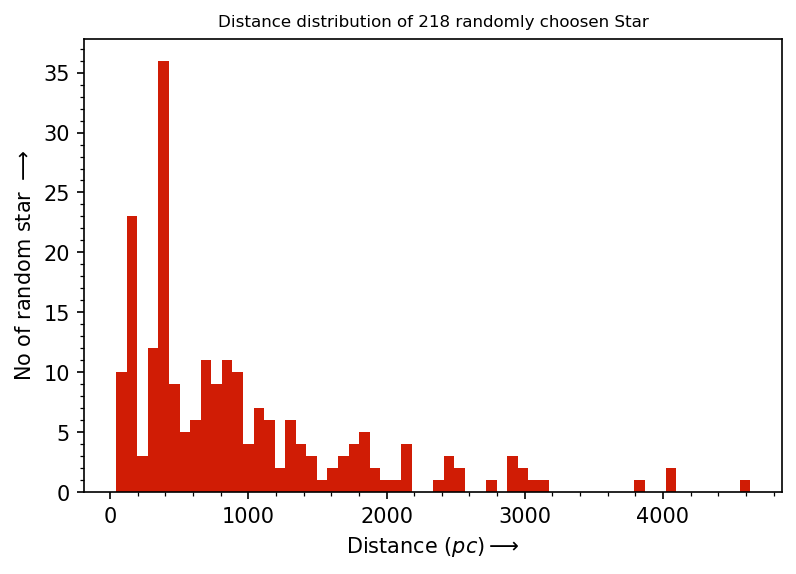

In [10]:
plt.figure(dpi=150)
plt.title("Distance distribution of 218 randomly choosen Star", fontsize = 8)
# histogram of the 218 randomly choosen star from our sample
plt.hist(random_star_sample['r_med_photogeo'], bins=herbig_bin, color = 'green', alpha = 0.9, ls = 'dotted')

# histogram of all 218 Herbig Ae/Be star
plt.hist(herbig_star["Dist"], bins= herbig_bin, color = 'red', alpha = 0.8, ls = 'dashed')
plt.xlabel(r"Distance $(pc)\longrightarrow$")
plt.ylabel(r"No of random star $\longrightarrow$")
plt.minorticks_on()
plt.show()

### $ \bm{\textbf{Extracting data from the gaia table around a star having ra and dec}}$

In [11]:
# defining a function for extracting data of stars from GAIA database around a choosen Object(Star or Herbig Ae/Be star)

# The function will take input query size, ra, dec of the centered boject and radius of the circle
# It will give output of ojects around that star in table form

def get_gaia_result(query_size, ra_obj, dec_obj, radius_deg):
    #from astroquery.gaia import Gaia

    query = """SELECT TOP {}""".format(query_size) + """
        g.source_id, g.ra, g.dec, g.parallax, g.parallax_error, d3.r_med_geo, d3.r_lo_geo, d3.r_hi_geo, (d3.r_hi_geo - d3.r_lo_geo)/(2*d3.r_med_geo) AS fdu_geo, d3.r_med_photogeo, d3.r_lo_photogeo, d3.r_hi_photogeo,
        (d3.r_hi_photogeo - d3.r_lo_photogeo)/(2*d3.r_med_photogeo) AS fdu_photogeo, g.phot_g_mean_mag, g.phot_bp_mean_mag, g.phot_rp_mean_mag, g.bp_rp, g.phot_g_mean_mag + 5*log10(g.parallax) - 10 AS mv,
        w.w1mpro, w.w2mpro, w.w3mpro, w.w4mpro, tt.j_m, tt.h_m, tt.ks_m
        FROM gaiadr2.gaia_source as g, gaiadr2.allwise_best_neighbour as x, allwise_original_valid as w, gaiadr2.tmass_best_neighbour as t, tmass_original_valid as tt, external.gaiaedr3_distance AS d3
        WHERE CONTAINS(POINT(g.ra, g.dec), CIRCLE({}""".format(ra_obj) + """, {}""".format(dec_obj)+""", {}""".format(radius_deg) + """ )) = 1 AND g.parallax > 0.0 AND
        g.parallax IS NOT NULL AND g.bp_rp IS NOT NULL AND ((g.source_id = x.source_id AND x.allwise_oid = w.allwise_oid) AND (g.source_id = t.source_id AND t.tmass_oid = tt.tmass_oid)) AND (g.source_id = d3.source_id)
        """

    job = Gaia.launch_job(query)
    result = job.get_results()

    return result


### $\textbf{Counting function}$

#### $\textbf{Boundary Equation}$

In [12]:
# Defining the equation of straight line for the boundries

#--------------------------------------------------------------------------------------
#--------------------------------------------------------------------------------------


def equation1(y):

    x = 2.5 - 1.0/5.0 * (y - 1)

    return x

def equation2(y):
    
    x = 1.8 + 1.9/4.0 * (y - 4.5)

    return x

def equation3(y):
   
    x = 3.7 + 9.0/40.0 * (y - 8.5)
    
    return x


#--------------------------------------------------------------------------------------
#--------------------------------------------------------------------------------------

# Defining a function which will count red object
# just we need to pass list of object(stars) with G-K as X- coordinate and Absolute Magnitude(Mv) as Y-coordinate 

def counting_fun(her_mg, her_gk):

    count_red = 0

    for i in range(len(her_mg)):

        if her_mg[i] <= 4.5:
            if her_gk[i] >= equation1(her_mg[i]):
                count_red = count_red + 1
        
        elif 4.5 < her_mg[i] and her_mg[i] <= 8.5:
            if her_gk[i] >= equation2(her_mg[i]):
                count_red = count_red + 1

        elif 8.5 < her_mg[i]:
            if her_gk[i] >= equation3(her_mg[i]):
                count_red = count_red + 1


    return count_red

In [13]:
# Defining a function which will count red object
# just we need to pass list of object(stars) with G-K as X- coordinate and Absolute Magnitude(Mv) as Y-coordinate

def red_counting_fun(her_mg, her_gk):

    count_red = 0

    # for i in range(len(her_mg)):

    if her_mg <= 4.5:
        if her_gk >= equation1(her_mg):
            count_red = count_red + 1

    elif 4.5 < her_mg and her_mg <= 8.5:
        if her_gk >= equation2(her_mg):
            count_red = count_red + 1

    elif 8.5 < her_mg:
        if her_gk >= equation3(her_mg):
            count_red = count_red + 1


def red_counting_fun(her_mg, her_gk):

    count_red = 0


In [14]:

def get_list_red_star(star_list):
    red_star_list = pd.DataFrame()

    for i in range(star_list.shape[0]):

        sample_object = star_list.loc[i]
        sample_object = (pd.DataFrame(sample_object)).transpose()

        mg = sample_object.iloc[0]["mv"]
        gk = sample_object.iloc[0]["phot_g_mean_mag"] - \
            sample_object.iloc[0]["ks_m"]
        no_red_star = red_counting_fun(mg, gk)

        if no_red_star == 1:

            red_star_list = pd.concat(
                (red_star_list, sample_object), axis=0, ignore_index=True)

    return red_star_list


### $\textbf{Creating a function for calculating the average error of red star around the main object}$

In [103]:
# THIS IS FOR HERBIG STAR


def red_star_error_analysis_herbig(herbig_list, rad_arcmin):
    rad_deg = rad_arcmin/60.0
    avg_geo_fdu = []
    avg_photogeo_fdu = []
    frac_red_star = []

    # for k in range(0,10):

    for k in tqdm(range(herbig_list.shape[0])):
        result_herb = get_gaia_result(
            1000, herbig_list["RAICRS"][k], herbig_list["DEICRS"][k], rad_deg)
        result_herb = result_herb[result_herb["parallax_error"] < 0.3]
        result_herb = result_herb.to_pandas()
        red_sample = get_list_red_star(result_herb)

        # Appending average fdu of all red star around a Main object

        if red_sample.empty:

            avg_geo_fdu.append(0)

            avg_photogeo_fdu.append(0)
            frac_red_star.append(0)
        else:

            avg_geo = np.mean(red_sample["fdu_geo"])
            avg_geo_fdu.append(avg_geo)
            avg_photogeo = np.mean(red_sample["fdu_photogeo"])
            avg_photogeo_fdu.append(avg_photogeo)
            frac_red_star.append((red_sample.shape[0])/result_herb.shape[0])

    return avg_geo_fdu, avg_photogeo_fdu, frac_red_star


# # THIS IS FOR RANDOM STAR


def red_star_error_analysis_random(random_list, rad_arcmin):
    rad_deg = rad_arcmin/60.0
    avg_geo_fdu = []
    avg_photogeo_fdu = []
    frac_red_star = []

    # for k in range(0,10):

    for k in tqdm(range(random_list.shape[0])):
        result_herb = get_gaia_result(
            1000, random_list["ra"][k], random_list["dec"][k], rad_deg)
        result_herb = result_herb[result_herb["parallax_error"] < 0.3]
        result_herb = result_herb.to_pandas()
        red_sample = get_list_red_star(result_herb)

        if red_sample.empty:

            avg_geo_fdu.append(0)

            avg_photogeo_fdu.append(0)
            frac_red_star.append(0)
        else:
            # Appending average fdu of all red star around a Main object

            avg_geo = np.mean(red_sample["fdu_geo"])
            avg_geo_fdu.append(avg_geo)
            avg_photogeo = np.mean(red_sample["fdu_photogeo"])
            avg_photogeo_fdu.append(avg_photogeo)
            frac_red_star.append((red_sample.shape[0])/result_herb.shape[0])

    return avg_geo_fdu, avg_photogeo_fdu, frac_red_star


In [104]:
herbig_result = red_star_error_analysis_herbig(herbig_star, 6.0)
random_result = red_star_error_analysis_random(random_star_sample, 6.0)

100%|██████████| 218/218 [07:03<00:00,  1.94s/it]


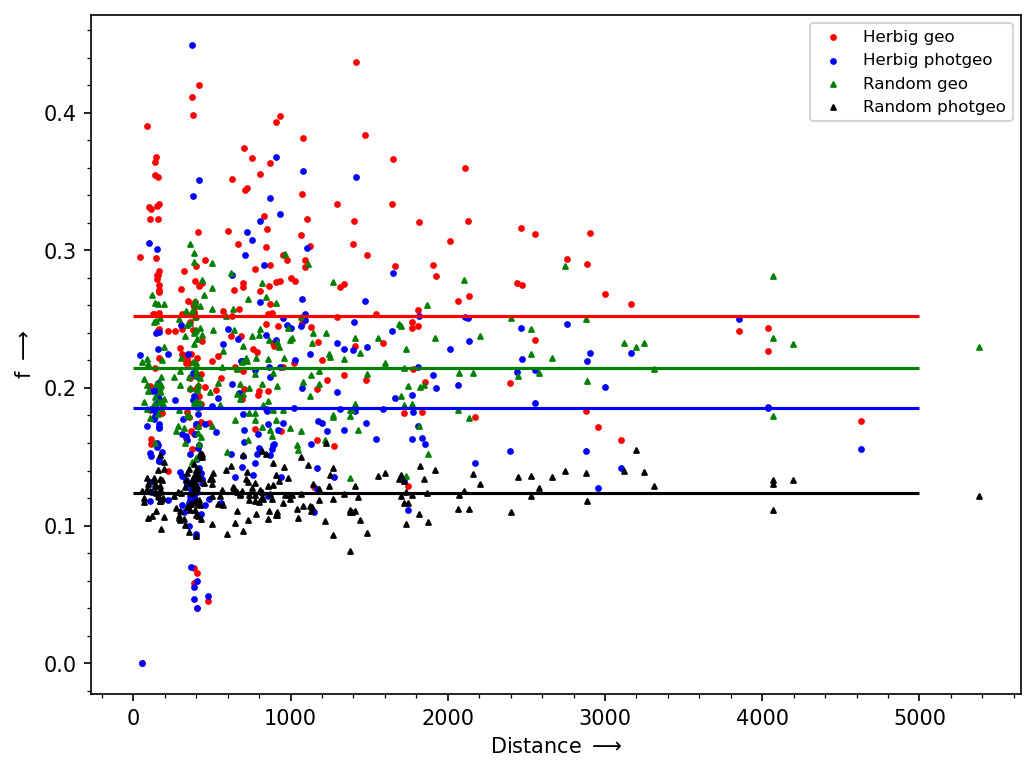

In [162]:
fig, ax = plt.subplots(dpi=150, figsize=[8, 6])
ax.set_xlabel(r"Distance $\longrightarrow$")
ax.set_ylabel(r"f $\longrightarrow$")
ax.scatter(herbig_star["Dist"], herbig_result[0], s=5, color='red', label='Herbig geo')
ax.scatter(herbig_star["Dist"], herbig_result[1], s=5,
           color='blue', label='Herbig photgeo')
ax.hlines(np.mean(herbig_result[0]), xmin=0, xmax=5000, colors='red')
ax.hlines(np.mean(herbig_result[1]), xmin=0, xmax=5000, colors='blue')

ax.scatter(random_star_sample["r_med_geo"], random_result[0], s=5, marker = "^", color='green', label='Random geo')
ax.scatter(random_star_sample["r_med_geo"], random_result[1], s=5, marker = "^",
           color='black', label='Random photgeo')
ax.hlines(np.mean(random_result[0]), xmin=0, xmax=5000, colors='green')
ax.hlines(np.mean(random_result[1]), xmin=0, xmax=5000, colors='black')


ax.legend(fontsize=8)
ax.minorticks_on()
plt.show()


### $\textbf{Plotting histogram}$

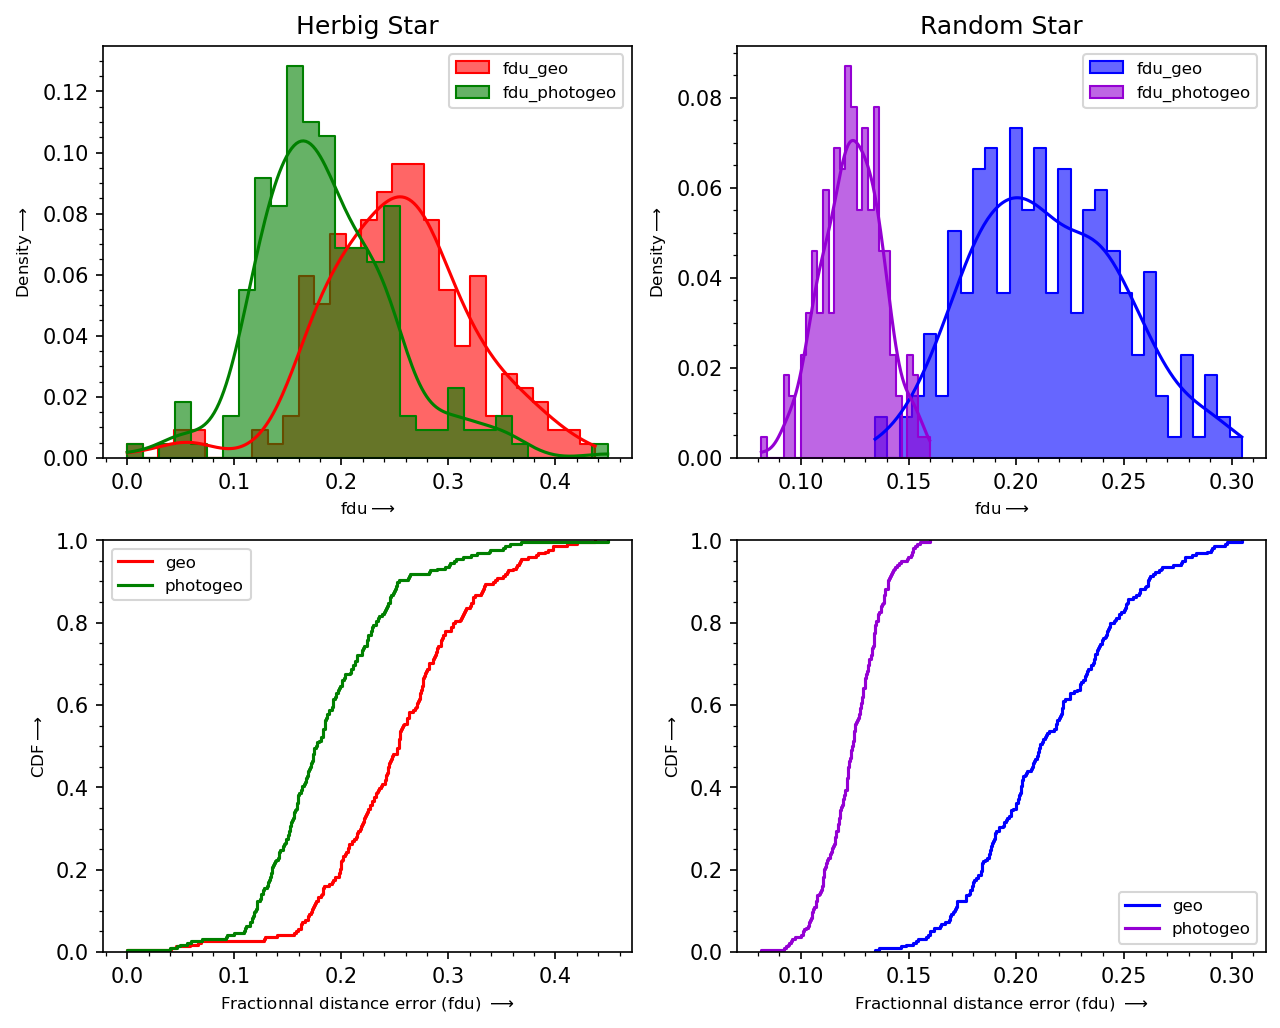

In [160]:
# FOR HERBIG STAR

fig, ax = plt.subplots(nrows=2, ncols=2, dpi = 150, figsize = (10, 8))
sn.histplot(herbig_result[0], bins = 30, ax=ax[0,0], stat='proportion', color='red', alpha = 0.6, label='fdu_geo', element='step', kde=True)
sn.histplot(herbig_result[1], bins = 30, ax=ax[0,0], stat='proportion', color = 'green',alpha = 0.6, label='fdu_photogeo', element = 'step', kde=True)
ax[0,0].legend(fontsize = 8)
ax[0,0].set_ylabel(r"Density$\longrightarrow$", fontsize = 8)
ax[0, 0].set_xlabel(r"fdu$\longrightarrow$", fontsize = 8)
ax[0, 0].minorticks_on()
ax[0,0].set_title("Herbig Star")
# ax[0, 0].spines['bottom'].set_visible(False)
# ax[0, 0].spines['top'].set_visible(False)


sn.ecdfplot(herbig_result[0], ax = ax[1, 0],color = 'red', label='geo')
sn.ecdfplot(herbig_result[1], ax = ax[1, 0],color = 'green', label = 'photogeo')
ax[1, 0].legend(fontsize = 8)
ax[1, 0].set_ylabel(r"CDF$\longrightarrow$", fontsize = 8)
ax[1, 0].set_xlabel(r"Fractionnal distance error (fdu) $\longrightarrow$", fontsize = 8)
ax[1, 0].minorticks_on()
# ax[1].spines['top'].set_visible(False)
# ax[1].spines['right'].set_visible(False)

# FOR RANDOM STAR

sn.histplot(random_result[0], bins = 30, ax=ax[0,1], stat='proportion', color='blue', alpha = 0.6, label='fdu_geo', element='step', kde=True)
sn.histplot(random_result[1], bins = 30, ax=ax[0,1], stat='proportion', color = '#9400D3',alpha = 0.6, label='fdu_photogeo', element = 'step', kde=True)
ax[0,1].legend(fontsize = 8)
ax[0,1].set_ylabel(r"Density$\longrightarrow$", fontsize = 8)
ax[0,1].set_xlabel(r"fdu$\longrightarrow$", fontsize = 8)
ax[0,1].minorticks_on()
ax[0,1].set_title("Random Star")
# ax[0, 0].spines['bottom'].set_visible(False)
# ax[0, 0].spines['top'].set_visible(False)


sn.ecdfplot(random_result[0], ax = ax[1, 1],color = 'blue', label='geo')
sn.ecdfplot(random_result[1], ax = ax[1, 1],color = '#9400D3', label = 'photogeo')
ax[1, 1].legend(fontsize = 8)
ax[1, 1].set_ylabel(r"CDF$\longrightarrow$", fontsize = 8)
ax[1, 1].set_xlabel(r"Fractionnal distance error (fdu) $\longrightarrow$", fontsize = 8)
ax[1, 1].minorticks_on()
# ax[1].spines['top'].set_visible(False)
# ax[1].spines['right'].set_visible(False)

plt.show()

## $\textbf{\Large{For T tauri Star} }$

In [198]:
tauri = pd.read_csv('t tauri.csv')
tauri_star = tauri[["Name", "_RA", "_DE", "mag"]]
tauri_star = tauri_star.sort_values(by='mag')
tauri_star = tauri_star.reset_index(drop=True)
tauri_star

,Name,_RA,_DE,mag
0,rho Per,46.29374,38.84053,3.3
1,eta Gem,93.71957,22.50682,3.8
2,chi Cyg,297.64141,32.91415,4.0
3,R Sct,281.87073,-5.70507,4.8
4,NZ Gem,115.51341,14.20853,5.0
...,...,...,...,...
163,RR Boo,221.77413,39.31710,14.1
164,SS Oph,254.46239,-2.76178,14.4
165,RU Aql,303.18675,12.99481,14.5
166,W Dra,271.39421,65.95600,14.5


In [247]:
k = 50
tt = get_gaia_result(1000, tauri_star["_RA"][k], tauri_star["_DE"][k], 6.0/60.0)
tt = tt[tt["parallax_error"] < 0.3]
tt_gk = tt["phot_g_mean_mag"] - tt["ks_m"]
tt_mg = tt["mv"]

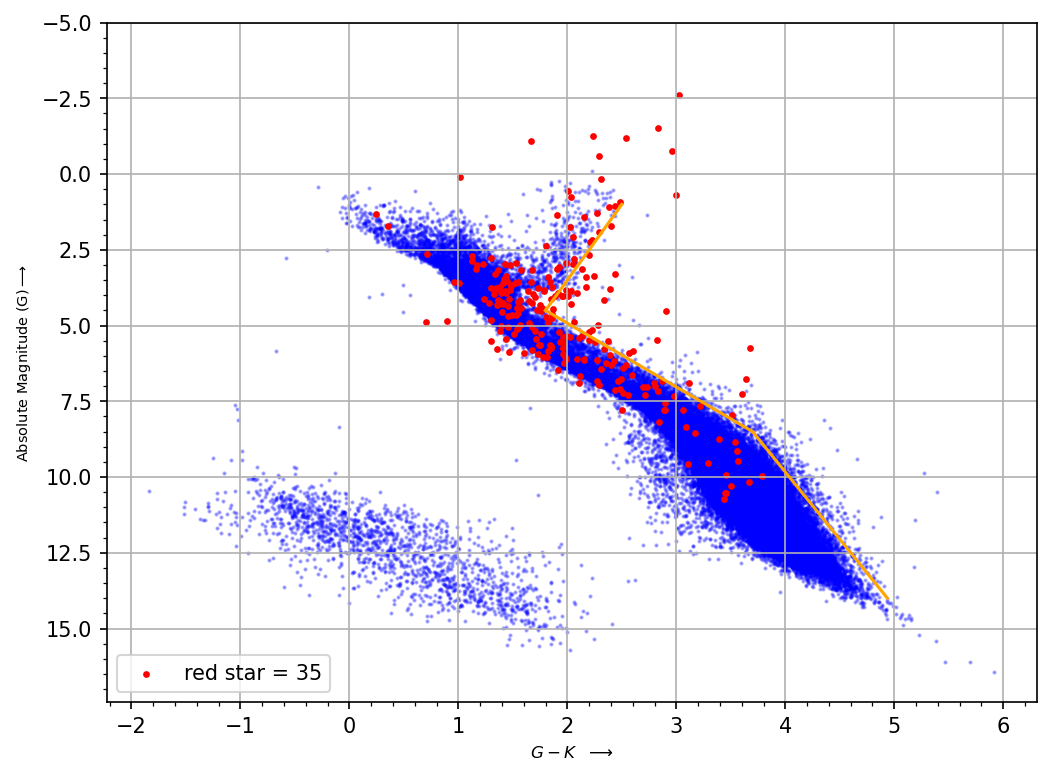

In [248]:
fig, ax1 = plt.subplots(dpi=150, figsize = [8, 6])
red_star = counting_fun(tt_mg, tt_gk)

ax1.scatter(gk_1m, mg, c = 'blue', s=1, alpha=0.3)
ax1.scatter(tt_gk, tt_mg, c = 'red', s = 5, label = 'red star = {}'.format(red_star))
ax1.minorticks_on()
ax1.grid(True)
ax1.legend(loc = 'lower left')
ax1.set_ylim(max(df.mg)+1, -5)
ax1.set_xlabel(r"$G - K~~\longrightarrow$", fontsize = 8)
ax1.set_ylabel(r"Absolute Magnitude (G)$\longrightarrow$", fontsize = 7)
ax1.plot(equation1(y_values1), y_values1,  color = 'orange')
ax1.plot(equation2(y_values2), y_values2,  color = 'orange')
ax1.plot(equation3(y_values3), y_values3, color = 'orange')
plt.show()


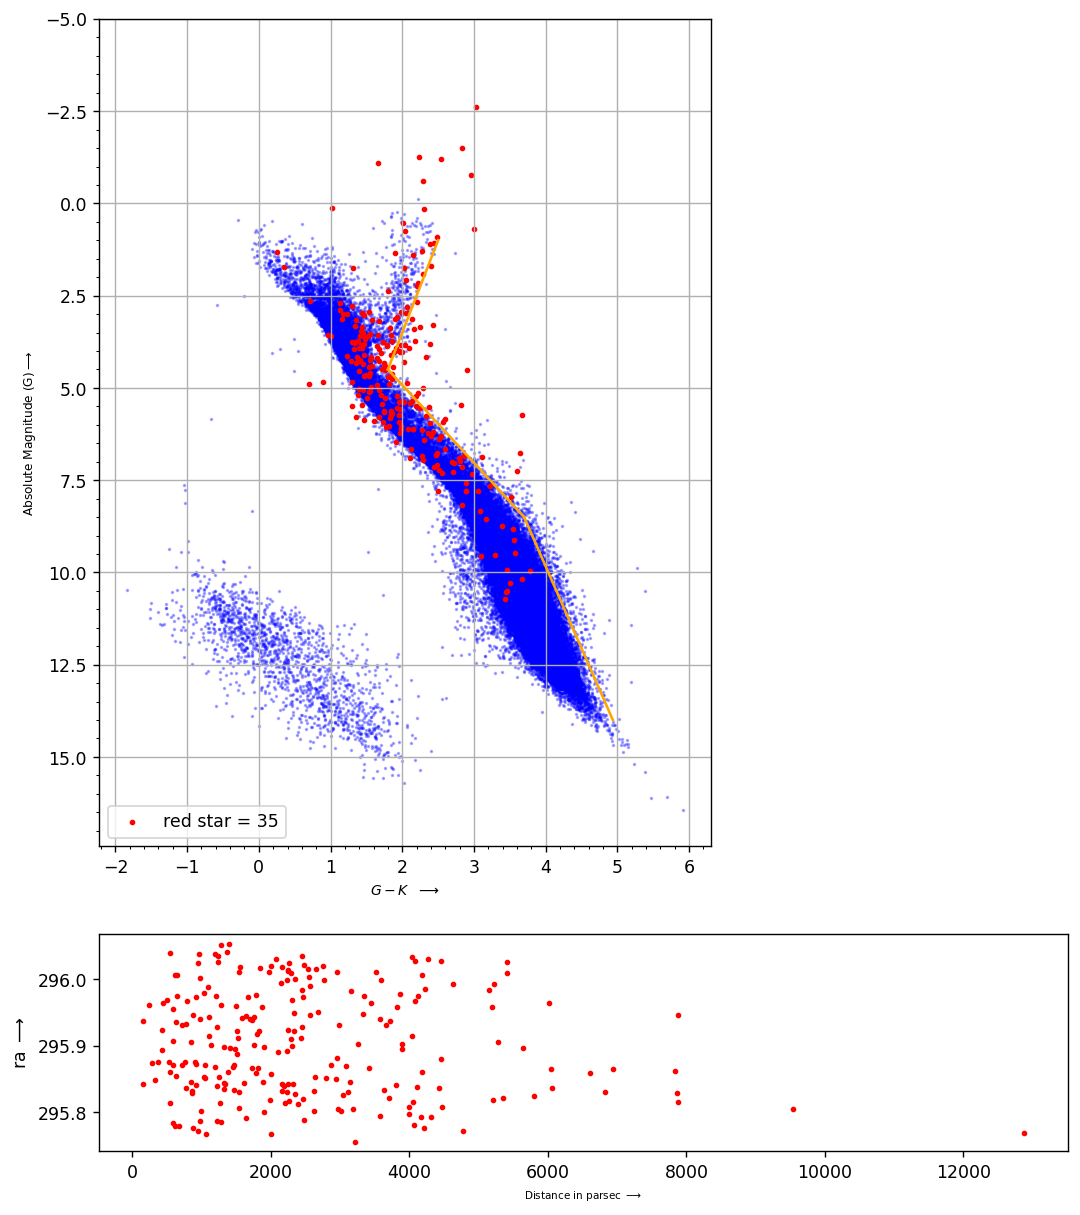

In [249]:

fig = plt.figure(figsize=(10,12), dpi=125)
grid = plt.GridSpec(4, 3, wspace=0.4, hspace=0.4)
# make subplots
ax1 = plt.subplot(grid[0:3, 0:2])
ax2 = plt.subplot(grid[3, 0:])


red_star = counting_fun(tt_mg, tt_gk)
#ax1.set_title("For star, Source_id/Name = {}".format(id), fontsize = 8)
ax1.scatter(gk_1m, mg, c = 'blue', s=1, alpha=0.3)
ax1.scatter(tt_gk, tt_mg, c = 'red', s = 5, label = 'red star = {}'.format(red_star))
ax1.minorticks_on()
ax1.grid(True)
ax1.legend(loc = 'lower left')
ax1.set_ylim(max(df.mg)+1, -5)
ax1.set_xlabel(r"$G - K~~\longrightarrow$", fontsize = 8)
ax1.set_ylabel(r"Absolute Magnitude (G)$\longrightarrow$", fontsize = 7)
ax1.plot(equation1(y_values1), y_values1,  color = 'orange')
ax1.plot(equation2(y_values2), y_values2,  color = 'orange')
ax1.plot(equation3(y_values3), y_values3, color = 'orange')



ax2.scatter(tt["r_med_geo"], tt["ra"], c = 'red', s = 5)
# ax2.scatter(Dist, ra, c = 'blue', s = 10)
ax2.set_xlabel(r"Distance in parsec $\longrightarrow$", fontsize = 6)
ax2.set_ylabel(r"ra $\longrightarrow$")

# Filtering out the value 
# tt = tt.to_pandas()
# sigma_herb = (E_Dist + e_Dist)/2

# tt = tt[abs(tt["r_med_geo"] - Dist) <= (np.sqrt(((tt["r_hi_geo"] - tt["r_lo_geo"])/2.0 )**2 + sigma_herb**2 ))]
        

# res_gk = tt["phot_g_mean_mag"] - tt["ks_m"]
# res_mg = tt["mv"]
# red_star = counting_fun(res_mg, res_gk)

# #ax3.set_title("Stars after filterig out distance error, dist_error < {}".format(frac), fontsize = 6)
# ax3.scatter(tt["r_med_geo"], tt["ra"], c = 'green', s = 5, label = "No. of red star = {}".format(red_star))
# ax3.scatter(Dist, ra, c = 'blue', s = 10)
# ax3.set_xlabel(r"Distance in parsec $\longrightarrow$", fontsize = 8)
# ax3.set_ylabel(r"ra $\longrightarrow$", fontsize = 8)
# ax3.legend()
# ax2.minorticks_on()
# ax3.minorticks_on()
plt.show()

In [238]:
df_tauri = pd.read_csv("20 t tauri star.csv")

In [239]:
tauri_20 = df_tauri[["source_id", "ra", "dec", "parallax", "r_med_geo", "r_hi_geo", "r_lo_geo"]]

In [233]:
tauri_20 = tauri_20.sort_values(by="r_med_geo")
tauri_20 = tauri_20.reset_index(drop=True)

In [234]:
tauri_20

,source_id,ra,dec,parallax,r_med_geo,r_hi_geo,r_lo_geo
0,266367210206027776,79.323709,53.586055,3.495766,282.40503,293.75950,272.30957
1,3399013173616323200,88.954820,20.175160,3.492420,287.58368,300.08466,274.46010
2,379224622734044800,6.008016,38.576902,2.644378,378.12270,397.75214,355.82617
3,351930930201512832,34.387337,44.304921,2.212528,445.28198,466.43384,428.44672
4,4315173197283473280,294.506721,11.721672,1.793477,545.39170,576.78735,517.30580
5,1279554668255201152,219.298107,26.736624,1.520435,637.84960,665.62560,615.22780
6,189425070122911616,85.032908,37.636292,1.343222,742.92160,822.25684,655.73890
7,1648328016354496384,248.167378,66.755007,1.250918,791.55304,831.67320,750.22850
8,502144181563726976,71.425792,75.100925,1.093516,877.33417,909.05870,845.58040
9,2807775362988454528,8.094664,26.029409,0.943540,1010.48040,1105.30260,962.19020


In [250]:
k = 5
10
tt = get_gaia_result(1000, tauri_20["ra"][k], tauri_20["dec"][k], 6.0/60.0)
tt = tt[tt["parallax_error"] < 0.3]
tt_gk = tt["phot_g_mean_mag"] - tt["ks_m"]
tt_mg = tt["mv"]

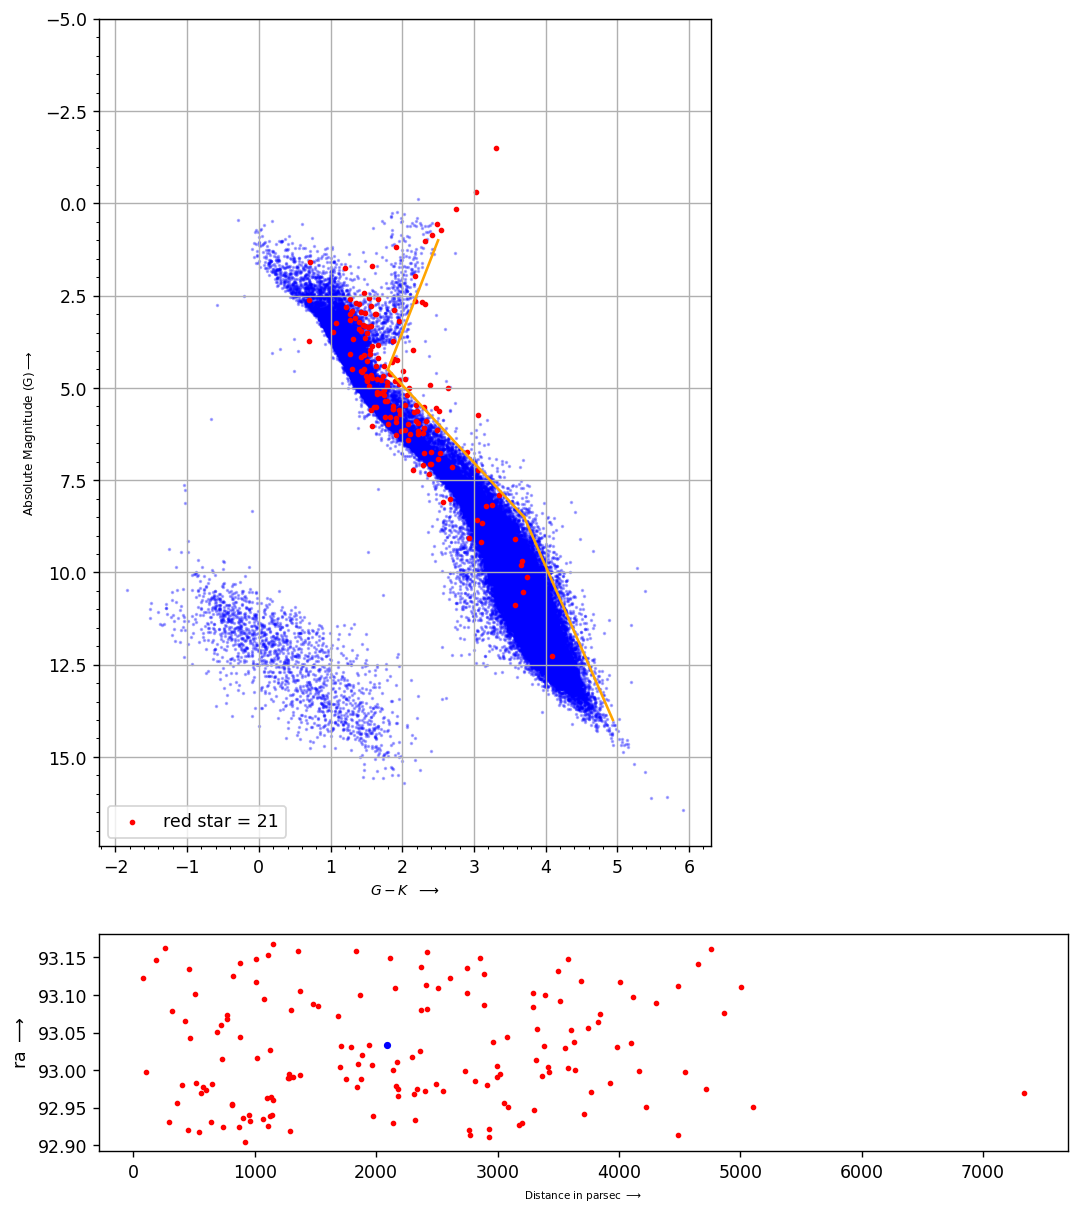

In [251]:

fig = plt.figure(figsize=(10,12), dpi=125)
grid = plt.GridSpec(4, 3, wspace=0.4, hspace=0.4)
# make subplots
ax1 = plt.subplot(grid[0:3, 0:2])
ax2 = plt.subplot(grid[3, 0:])


red_star = counting_fun(tt_mg, tt_gk)
#ax1.set_title("For star, Source_id/Name = {}".format(id), fontsize = 8)
ax1.scatter(gk_1m, mg, c = 'blue', s=1, alpha=0.3)
ax1.scatter(tt_gk, tt_mg, c = 'red', s = 5, label = 'red star = {}'.format(red_star))
ax1.minorticks_on()
ax1.grid(True)
ax1.legend(loc = 'lower left')
ax1.set_ylim(max(df.mg)+1, -5)
ax1.set_xlabel(r"$G - K~~\longrightarrow$", fontsize = 8)
ax1.set_ylabel(r"Absolute Magnitude (G)$\longrightarrow$", fontsize = 7)
ax1.plot(equation1(y_values1), y_values1,  color = 'orange')
ax1.plot(equation2(y_values2), y_values2,  color = 'orange')
ax1.plot(equation3(y_values3), y_values3, color = 'orange')
Dist = tauri_20["r_med_geo"][k]
ra = tauri_20["ra"][k]


ax2.scatter(tt["r_med_geo"], tt["ra"], c = 'red', s = 5)
ax2.scatter(Dist, ra, c = 'blue', s = 10)
ax2.set_xlabel(r"Distance in parsec $\longrightarrow$", fontsize = 6)
ax2.set_ylabel(r"ra $\longrightarrow$")

# Filtering out the value 
# tt = tt.to_pandas()
# sigma_herb = (E_Dist + e_Dist)/2

# tt = tt[abs(tt["r_med_geo"] - Dist) <= (np.sqrt(((tt["r_hi_geo"] - tt["r_lo_geo"])/2.0 )**2 + sigma_herb**2 ))]
        

# res_gk = tt["phot_g_mean_mag"] - tt["ks_m"]
# res_mg = tt["mv"]
# red_star = counting_fun(res_mg, res_gk)

# #ax3.set_title("Stars after filterig out distance error, dist_error < {}".format(frac), fontsize = 6)
# ax3.scatter(tt["r_med_geo"], tt["ra"], c = 'green', s = 5, label = "No. of red star = {}".format(red_star))
# ax3.scatter(Dist, ra, c = 'blue', s = 10)
# ax3.set_xlabel(r"Distance in parsec $\longrightarrow$", fontsize = 8)
# ax3.set_ylabel(r"ra $\longrightarrow$", fontsize = 8)
# ax3.legend()
# ax2.minorticks_on()
# ax3.minorticks_on()
plt.show()

In [252]:
def final_result_tauri(t_tauri_star_list, search_radius):
    
    
    def list_red_object(radius):

        num_tot_star_tau = []  # Creating a numpy array for storing the total number of stars around a Herbig Ae/Be star
        num_red_star_tau = []   # For red object around Herbig Ae/Be star
        
        


        for i in range(t_tauri_star_list.shape[0]):

            t_tauri = get_gaia_result(1000, t_tauri_star_list.loc[i][1], t_tauri_star_list.loc[i][2], radius)
            # Filtering out stars on the basis of parallax error
            t_tauri = t_tauri[t_tauri["parallax_error"] < 0.3]
            tau_mg = t_tauri["mv"]
            tau_gk = t_tauri["phot_g_mean_mag"] - t_tauri["ks_m"]

            
            #--------------------------------------------------------------------------------

            
            """ Counting Red Object around a T-Tauri Star"""

            tau_red_star = counting_fun(tau_mg, tau_gk)

            num_tot_star_tau.append(len(tau_mg))
            num_red_star_tau.append(tau_red_star)


        return num_red_star_tau, num_tot_star_tau

    rad_arcmin = search_radius
    all_list = list_red_object(rad_arcmin/60.0)
    
    # -----------------------------------------------------------------------
    num_red_star_her = all_list[0]
    num_tot_star_her = all_list[1]
    


    #-----------------------------------------------------------------------------

    # Creating list for storing the fractional values of red star after and before the distance filter

    tauri_red_frac = []


    for i in range(len(num_red_star_her)):

        # THIS IS FOR HERBIG STARS
        if num_tot_star_her[i] == 0:
            f1 = 0.0
            tauri_red_frac.append(f1)

        else:
            f1 = num_red_star_her[i]/num_tot_star_her[i]
            tauri_red_frac.append(f1)
        

    return tauri_red_frac

    

In [263]:
tauri_red_frac = final_result_tauri(tauri_20, 3.0)

In [264]:
np.mean(tauri_red_frac)

0.29538384042744503

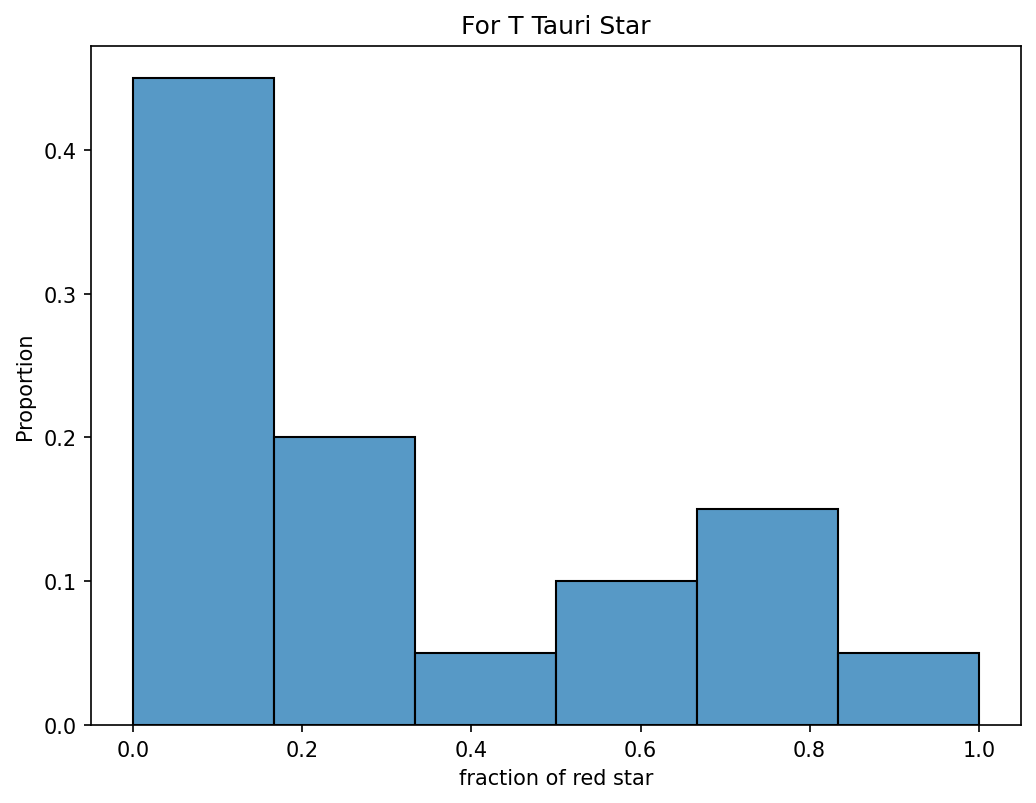

In [265]:
plt.figure(dpi = 150, figsize = [8, 6])
sn.histplot(tauri_red_frac, stat='proportion')
plt.xlabel("fraction of red star")
plt.title("For T Tauri Star")
plt.show()

# $ \textbf{Analysis on distance type - geometric distance vs photogeometric distance }$

In [113]:
k = 200


ra = herbig_star["RAICRS"][k]
dec = herbig_star["DEICRS"][k]
E_Dist = herbig_star["E_Dist"][k]
e_Dist = herbig_star["e_Dist"][k]
Dist = herbig_star["Dist"][k]


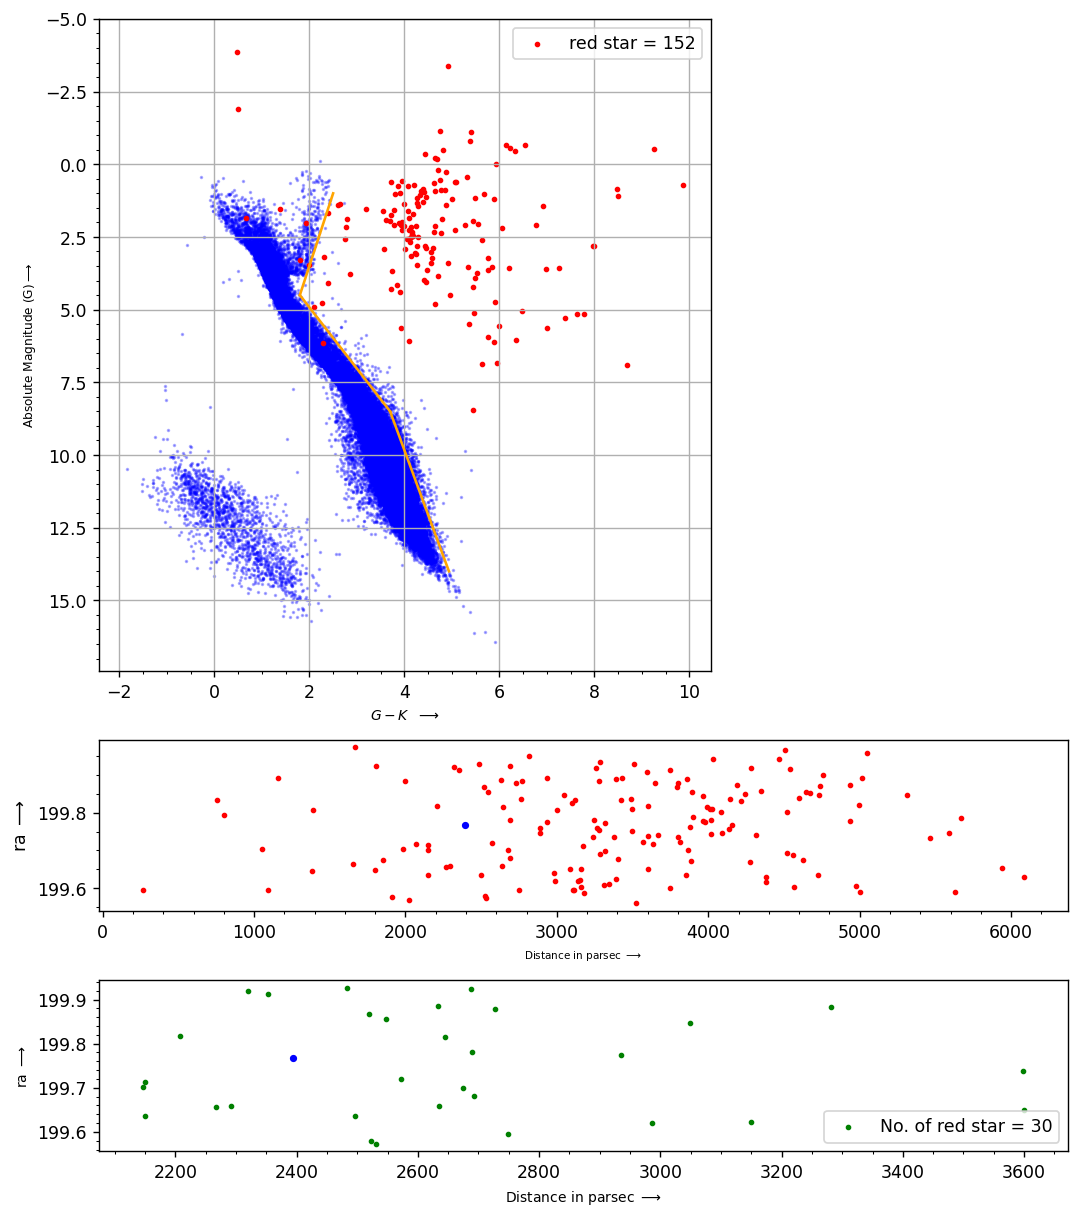

In [114]:


ra = herbig_star["RAICRS"][k]
dec = herbig_star["DEICRS"][k]
E_Dist = herbig_star["E_Dist"][k]
e_Dist = herbig_star["e_Dist"][k]
Dist = herbig_star["Dist"][k]
rad = 6.0
result = get_gaia_result(10000, ra, dec, rad/60.0)
result = result[result["parallax_error"] < 0.3]


res_gk = result["phot_g_mean_mag"] - result["ks_m"]
res_mg = result["mv"]
red_star = counting_fun(res_mg, res_gk)

fig = plt.figure(figsize=(10,12), dpi=125)
grid = plt.GridSpec(5, 3, wspace=0.4, hspace=0.4)
# make subplots
ax1 = plt.subplot(grid[0:3, 0:2])
ax2 = plt.subplot(grid[3, 0:])
ax3 = plt.subplot(grid[4, 0:])


#ax1.set_title("For star, Source_id/Name = {}".format(id), fontsize = 8)
ax1.scatter(gk_1m, mg, c = 'blue', s=1, alpha=0.3)
ax1.scatter(res_gk, res_mg, c = 'red', s = 5, label = 'red star = {}'.format(red_star))
ax1.minorticks_on()
ax1.grid(True)
ax1.legend()
ax1.set_ylim(max(df.mg)+1, -5)
ax1.set_xlabel(r"$G - K~~\longrightarrow$", fontsize = 8)
ax1.set_ylabel(r"Absolute Magnitude (G)$\longrightarrow$", fontsize = 7)
ax1.plot(equation1(y_values1), y_values1,  color = 'orange')
ax1.plot(equation2(y_values2), y_values2,  color = 'orange')
ax1.plot(equation3(y_values3), y_values3, color = 'orange')



ax2.scatter(result["r_med_geo"], result["ra"], c = 'red', s = 5)
ax2.scatter(Dist, ra, c = 'blue', s = 10)
ax2.set_xlabel(r"Distance in parsec $\longrightarrow$", fontsize = 6)
ax2.set_ylabel(r"ra $\longrightarrow$")

# Filtering out the value 
# result = result.to_pandas()
sigma_herb = (E_Dist + e_Dist)/2

result = result[abs(result["r_med_geo"] - Dist) <= (np.sqrt(((result["r_hi_geo"] - result["r_lo_geo"])/2.0 )**2 + sigma_herb**2 ))]
        

res_gk = result["phot_g_mean_mag"] - result["ks_m"]
res_mg = result["mv"]
red_star = counting_fun(res_mg, res_gk)

#ax3.set_title("Stars after filterig out distance error, dist_error < {}".format(frac), fontsize = 6)
ax3.scatter(result["r_med_geo"], result["ra"], c = 'green', s = 5, label = "No. of red star = {}".format(red_star))
ax3.scatter(Dist, ra, c = 'blue', s = 10)
ax3.set_xlabel(r"Distance in parsec $\longrightarrow$", fontsize = 8)
ax3.set_ylabel(r"ra $\longrightarrow$", fontsize = 8)
ax3.legend()
ax2.minorticks_on()
ax3.minorticks_on()
plt.show()

### $\textbf{Defining a function which will calculate red fraction of star around a Object}$

In [115]:
def final_result_photogeo(herbig_star_list, random_star_list, search_radius):
    

    def list_red_object(radius):

        num_tot_star_her = []  # Creating a numpy array for storing the total number of stars around a Herbig Ae/Be star
        num_red_star_her = []   # For red object around Herbig Ae/Be star
        num_tot_star_rand = []  # For toatal star around random star
        num_red_star_rand = []  # For red objec around the Random Star

        # After  distance filter

        after_num_tot_star_her = []  # Creating a numpy array for storing the total number of stars around a Herbig Ae/Be star
        after_num_red_star_her = []   # For red object around Herbig Ae/Be star
        after_num_tot_star_rand = []  # For toatal star around random star
        after_num_red_star_rand = []  # For red objec around the Random Star
        


        for i in tqdm(range(herbig_star_list.shape[0])):

            herbig_star = get_gaia_result(1000, herbig_star_list.loc[i][1], herbig_star_list.loc[i][2], radius)
            # Filtering out stars on the basis of parallax error
            herbig_star = herbig_star[herbig_star["parallax_error"] < 0.3]
            her_mg = herbig_star["mv"]
            her_gk = herbig_star["phot_g_mean_mag"] - herbig_star["ks_m"]

            # Considering only those sources which lies within the 2*(sigma_main^2 + sigma_nearby^2)^(0.5) distance error of the main source.

            sigma_herb = (herbig_star_list["E_Dist"][i] + herbig_star_list["e_Dist"][i])/2

            herbig_star_after = herbig_star[abs(herbig_star["r_med_photogeo"] - herbig_star_list["Dist"][i]) < 2*np.sqrt(((herbig_star["r_hi_photogeo"] - herbig_star["r_lo_photogeo"])/2 )**2 + sigma_herb**2 )]
           
            her_mg_af = herbig_star_after["mv"]
            her_gk_af = herbig_star_after["phot_g_mean_mag"] - herbig_star_after["ks_m"]
                    




            #-----------------------------------------------------------------------------
            rand_star = get_gaia_result(1000, random_star_list.loc[i][1], random_star_list.loc[i][2], radius)
            rand_star = rand_star[rand_star["parallax_error"] < 0.3]
            rand_mg = rand_star["mv"]
            rand_gk = rand_star["phot_g_mean_mag"] - rand_star["ks_m"]

            # -----------------------------------------



            sigma_star = (random_star_list["r_hi_photogeo"][i] - random_star_list["r_lo_photogeo"][i])/2
            random_star_after = rand_star[abs(rand_star["r_med_photogeo"] - random_star_list["r_med_photogeo"][i]) < (2*np.sqrt(((rand_star["r_hi_photogeo"] - rand_star["r_lo_photogeo"])/2 )**2 + sigma_herb**2 ))]
        
            rand_mg_af = random_star_after["mv"]
            rand_gk_af = random_star_after["phot_g_mean_mag"] - random_star_after["ks_m"]
            
            #--------------------------------------------------------------------------------

            
            """ Counting Red Object around a Herbig Ae/Be Star"""

            her_red_star = counting_fun(her_mg, her_gk)

            num_tot_star_her.append(len(her_mg))
            num_red_star_her.append(her_red_star)


            af_her_red = counting_fun(her_mg_af, her_gk_af)
            after_num_tot_star_her.append(len(her_mg_af))
            after_num_red_star_her.append(af_her_red)


            """ Counting Red Object around a Random Star"""
            
            rand_red_star = counting_fun(rand_mg, rand_gk)
            num_tot_star_rand.append(len(rand_mg))
            num_red_star_rand.append(rand_red_star)


            af_star_red = counting_fun(rand_mg_af, rand_gk_af)
            after_num_tot_star_rand.append(len(rand_mg_af))
            after_num_red_star_rand.append(af_star_red)


            # print("total number of red object surrounding the Herbig Star {}".format(herbig_20.loc[i][0]) + " = {}".format(num_red_stars))
            # print("Toatal surrounding stars = {}".format(len(her_mg)))


        # print("List of total stars surrounding a herbig star within 6 arcminutes = ",num_tot_star_her) 
        # print("List red stars for 20 Herbig Stars = ",num_red_star_her)
        # print("List of total stars surrounding a Random star within 6 arcminutes = ",num_tot_star_rand) 
        # print("List red stars for 20 Random stars = ",num_red_star_rand)

        return num_red_star_her, num_tot_star_her, num_red_star_rand, num_tot_star_rand, after_num_red_star_her, after_num_tot_star_her, after_num_red_star_rand, after_num_tot_star_rand
        

    rad_arcmin = search_radius
    all_list = list_red_object(rad_arcmin/60.0)
    
    # -----------------------------------------------------------------------
    num_red_star_her = all_list[0]
    num_tot_star_her = all_list[1]
    num_red_star_rand = all_list[2]
    num_tot_star_rand = all_list[3]
    af1 = all_list[4]
    af2 = all_list[5]
    af3 = all_list[6]
    af4 = all_list[7]


    #-----------------------------------------------------------------------------

    # Creating list for storing the fractional values of red star after and before the distance filter

    frac_before_herb = []
    frac_before_rand = []
    frac_after_herb = []
    frac_after_rand = []

    for i in range(len(num_red_star_her)):

        # THIS IS FOR HERBIG STARS
        if num_tot_star_her[i] == 0:
            f1 = 0.0
            frac_before_herb.append(f1)

        else:
            f1 = num_red_star_her[i]/num_tot_star_her[i]
            frac_before_herb.append(f1)
        


        if af2[i] == 0:
            f1 = 0.0
            frac_after_herb.append(f1)
        
        else:
            f1 = af1[i]/af2[i]
            frac_after_herb.append(f1)


        # THIS IS FOR RANDOM STAR

        if num_tot_star_rand[i] == 0:
            f1 = 0.0
            frac_before_rand.append(f1)

        else:
            f1 = num_red_star_rand[i]/num_tot_star_rand[i]
            frac_before_rand.append(f1)
        

        if af4[i] == 0:
            f1 = 0.0
            frac_after_rand.append(f1)
        
        else:
            f1 = af3[i]/af4[i]
            frac_after_rand.append(f1)

    



    return frac_before_herb, frac_after_herb, frac_before_rand, frac_after_rand


In [116]:
def final_result_geo(herbig_star_list, random_star_list, search_radius):
    

    def list_red_object(radius):

        num_tot_star_her = []  # Creating a numpy array for storing the total number of stars around a Herbig Ae/Be star
        num_red_star_her = []   # For red object around Herbig Ae/Be star
        num_tot_star_rand = []  # For toatal star around random star
        num_red_star_rand = []  # For red objec around the Random Star

        # After  distance filter

        after_num_tot_star_her = []  # Creating a numpy array for storing the total number of stars around a Herbig Ae/Be star
        after_num_red_star_her = []   # For red object around Herbig Ae/Be star
        after_num_tot_star_rand = []  # For toatal star around random star
        after_num_red_star_rand = []  # For red objec around the Random Star
        


        for i in tqdm(range(herbig_star_list.shape[0])):

            herbig_star = get_gaia_result(1000, herbig_star_list.loc[i][1], herbig_star_list.loc[i][2], radius)
            # Filtering out stars on the basis of parallax error
            herbig_star = herbig_star[herbig_star["parallax_error"] < 0.3]
            her_mg = herbig_star["mv"]
            her_gk = herbig_star["phot_g_mean_mag"] - herbig_star["ks_m"]

            # Considering only those sources which lies within the 2*(sigma_main^2 + sigma_nearby^2)^(0.5) distance error of the main source.

            sigma_herb = (herbig_star_list["E_Dist"][i] + herbig_star_list["e_Dist"][i])/2

            herbig_star_after = herbig_star[abs(herbig_star["r_med_geo"] - herbig_star_list["Dist"][i]) < 2*np.sqrt(((herbig_star["r_hi_geo"] - herbig_star["r_lo_geo"])/2 )**2 + sigma_herb**2 )]
           
            her_mg_af = herbig_star_after["mv"]
            her_gk_af = herbig_star_after["phot_g_mean_mag"] - herbig_star_after["ks_m"]
                    




            #-----------------------------------------------------------------------------
            rand_star = get_gaia_result(1000, random_star_list.loc[i][1], random_star_list.loc[i][2], radius)
            rand_star = rand_star[rand_star["parallax_error"] < 0.3]
            rand_mg = rand_star["mv"]
            rand_gk = rand_star["phot_g_mean_mag"] - rand_star["ks_m"]

            # -----------------------------------------



            sigma_star = (random_star_list["r_hi_geo"][i] - random_star_list["r_lo_geo"][i])/2
            random_star_after = rand_star[abs(rand_star["r_med_geo"] - random_star_list["r_med_geo"][i]) < (2*np.sqrt(((rand_star["r_hi_geo"] - rand_star["r_lo_geo"])/2)**2 + sigma_herb**2 ))]
        
            rand_mg_af = random_star_after["mv"]
            rand_gk_af = random_star_after["phot_g_mean_mag"] - random_star_after["ks_m"]
            
            #--------------------------------------------------------------------------------

            
            """ Counting Red Object around a Herbig Ae/Be Star"""

            her_red_star = counting_fun(her_mg, her_gk)

            num_tot_star_her.append(len(her_mg))
            num_red_star_her.append(her_red_star)


            af_her_red = counting_fun(her_mg_af, her_gk_af)
            after_num_tot_star_her.append(len(her_mg_af))
            after_num_red_star_her.append(af_her_red)


            """ Counting Red Object around a Random Star"""
            
            rand_red_star = counting_fun(rand_mg, rand_gk)
            num_tot_star_rand.append(len(rand_mg))
            num_red_star_rand.append(rand_red_star)


            af_star_red = counting_fun(rand_mg_af, rand_gk_af)
            after_num_tot_star_rand.append(len(rand_mg_af))
            after_num_red_star_rand.append(af_star_red)


            # print("total number of red object surrounding the Herbig Star {}".format(herbig_20.loc[i][0]) + " = {}".format(num_red_stars))
            # print("Toatal surrounding stars = {}".format(len(her_mg)))


        # print("List of total stars surrounding a herbig star within 6 arcminutes = ",num_tot_star_her) 
        # print("List red stars for 20 Herbig Stars = ",num_red_star_her)
        # print("List of total stars surrounding a Random star within 6 arcminutes = ",num_tot_star_rand) 
        # print("List red stars for 20 Random stars = ",num_red_star_rand)

        return num_red_star_her, num_tot_star_her, num_red_star_rand, num_tot_star_rand, after_num_red_star_her, after_num_tot_star_her, after_num_red_star_rand, after_num_tot_star_rand
        

    rad_arcmin = search_radius
    all_list = list_red_object(rad_arcmin/60.0)
    
    # -----------------------------------------------------------------------
    num_red_star_her = all_list[0]
    num_tot_star_her = all_list[1]
    num_red_star_rand = all_list[2]
    num_tot_star_rand = all_list[3]
    af1 = all_list[4]
    af2 = all_list[5]
    af3 = all_list[6]
    af4 = all_list[7]


    #-----------------------------------------------------------------------------

    # Creating list for storing the fractional values of red star after and before the distance filter

    frac_before_herb = []
    frac_before_rand = []
    frac_after_herb = []
    frac_after_rand = []

    for i in range(len(num_red_star_her)):

        # THIS IS FOR HERBIG STARS
        if num_tot_star_her[i] == 0:
            f1 = 0.0
            frac_before_herb.append(f1)

        else:
            f1 = num_red_star_her[i]/num_tot_star_her[i]
            frac_before_herb.append(f1)
        


        if af2[i] == 0:
            f1 = 0.0
            frac_after_herb.append(f1)
        
        else:
            f1 = af1[i]/af2[i]
            frac_after_herb.append(f1)


        # THIS IS FOR RANDOM STAR

        if num_tot_star_rand[i] == 0:
            f1 = 0.0
            frac_before_rand.append(f1)

        else:
            f1 = num_red_star_rand[i]/num_tot_star_rand[i]
            frac_before_rand.append(f1)
        

        if af4[i] == 0:
            f1 = 0.0
            frac_after_rand.append(f1)
        
        else:
            f1 = af3[i]/af4[i]
            frac_after_rand.append(f1)

    



    return frac_before_herb, frac_after_herb, frac_before_rand, frac_after_rand


In [117]:
result_geo = final_result_geo(herbig_star[0:50], random_star_sample[0:50], 6.0)
result_photogeo = final_result_photogeo(herbig_star[0:50], random_star_sample[0:50], 6.0)

100%|██████████| 50/50 [03:05<00:00,  3.70s/it]


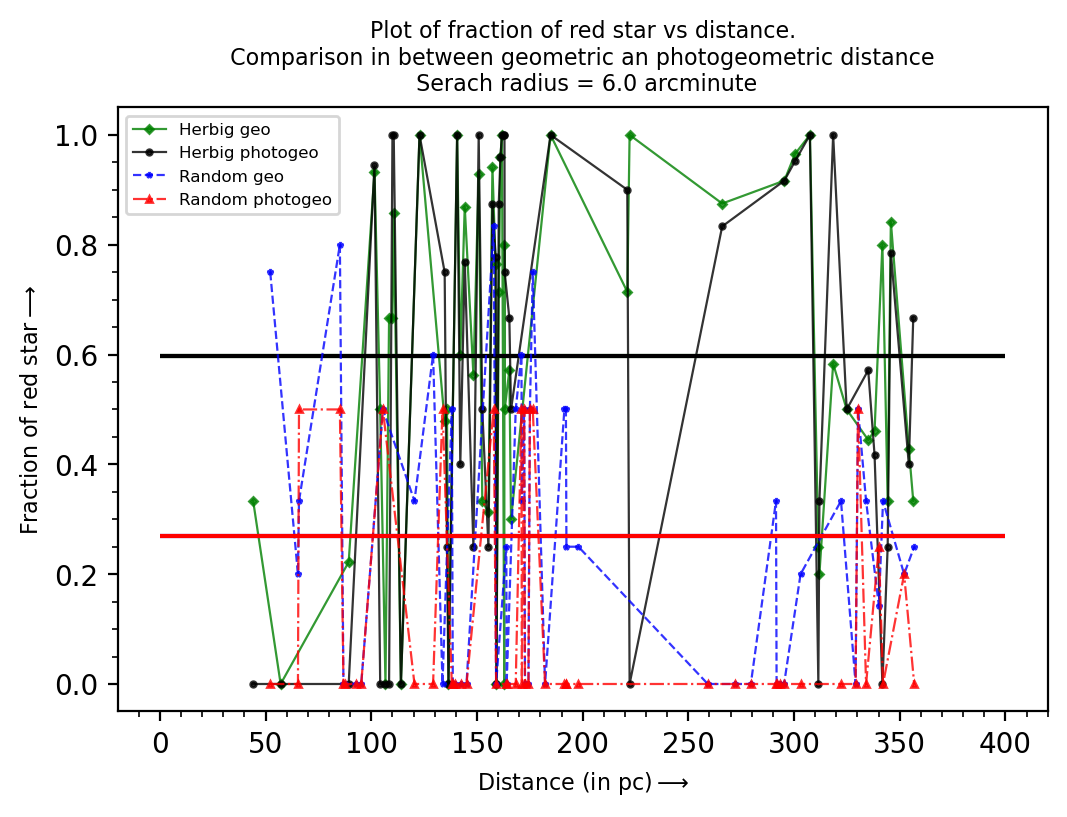

In [118]:
rad_arcmin = 6.0
fig, ax = plt.subplots(dpi = 200)
ax.set_xlabel(r"Distance (in pc)$\longrightarrow$", fontsize = 8)
ax.set_ylabel(r"Fraction of red star$\longrightarrow$", fontsize = 8)

# Herbig star

ax.plot(herbig_star["Dist"][0:50], result_geo[1], marker = "D", linewidth = 0.8, markersize = 2, label = "Herbig geo", alpha = 0.8, color = 'green')
ax.plot(herbig_star["Dist"][0:50], result_photogeo[1], marker = "o", linewidth = 0.8, markersize = 2, label = "Herbig photogeo", alpha = 0.8, color = 'black')
ax.hlines(y=np.mean(result_geo[0]), xmin=0, xmax= 400, color = 'green')
ax.hlines(y=np.mean(result_photogeo[0]), xmin=0, xmax= 400, color='black')


# Random star
ax.plot(random_star_sample["r_med_photogeo"][0:50], result_geo[3], '--', marker = "*", linewidth = 0.8, markersize = 2, label = "Random geo", alpha = 0.8, color = "blue")
ax.plot(random_star_sample["r_med_photogeo"][0:50], result_photogeo[3], "-.", marker = "^", linewidth = 0.8, markersize = 2, label = "Random photogeo", alpha = 0.8, color = 'red')
ax.hlines(y=np.mean(result_geo[2]), xmin=0, xmax= 400, color = 'blue')
ax.hlines(y=np.mean(result_geo[2]), xmin=0, xmax= 400, color='red')

ax.legend(fontsize = 6)
# ax.set_xscale("log")
ax.minorticks_on()
ax.set_title("""Plot of fraction of red star vs distance.\n Comparison in between geometric an photogeometric distance \n Serach radius = {} arcminute""".format(rad_arcmin), fontsize = 8)
plt.show()